In [190]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering,KMeans
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE #recursice feature elimination
from sklearn.naive_bayes import GaussianNB,CategoricalNB,BernoulliNB,MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier


data = pd.read_csv('heart_attack_ dataset.csv')
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0.0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0.0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0.0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0.0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1.0,0.6,2,0,2,1


About this dataset:
Age : Age of the patient
Sex : Sex of the patient ( 1 : man, 0 : women)
exang: exercise induced angina (1 = yes; 0 = no)
ca: number of major vessels (0-3)
cp : Chest Pain type chest pain type
Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic
trtbps : resting blood pressure (in mm Hg)
chol : cholestoral in mg/dl fetched via BMI sensor
fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
rest_ecg : resting electrocardiographic results
Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach : maximum heart rate achieved
target : 0= less chance of heart attack 1= more chance of heart attack


In [191]:
data.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng        float64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [192]:
# cek data
print(data.isnull().sum())
print('------')
print(data[data.duplicated()])

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        1
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64
------
     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
164   38    1   2     138   175    0        1       173   0.0      0.0    2   

     caa  thall  output  
164    4      2       1  


In [193]:
# remove duplicate
data=data.fillna(0)
data.drop_duplicates(inplace=True)
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [194]:
# describe data
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


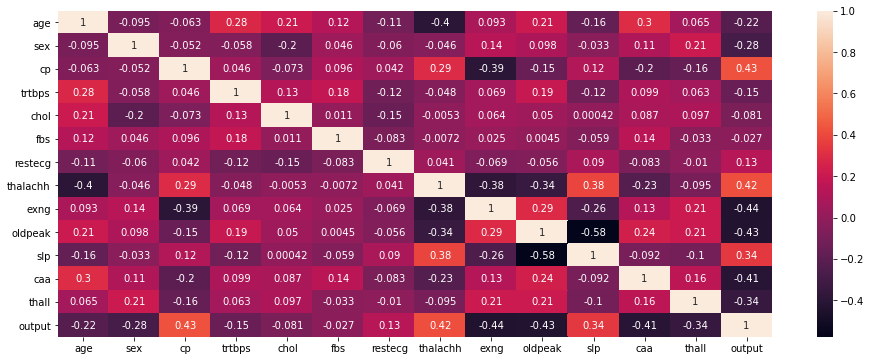

In [195]:
# Correlation
plt.figure(figsize=(16, 6))
sns.heatmap(data.corr(),annot=True)

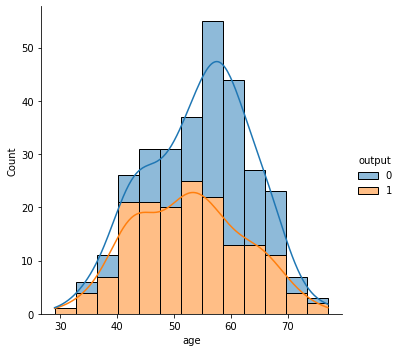

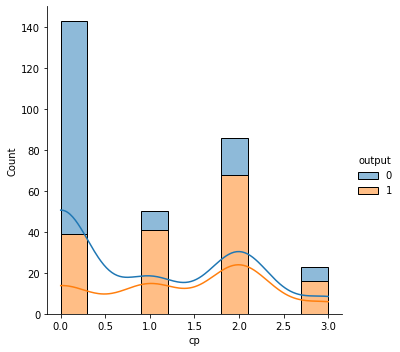

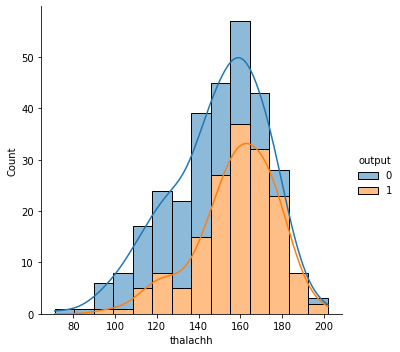

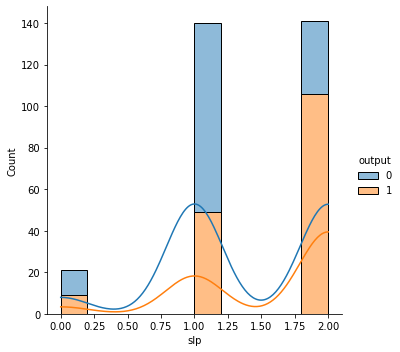

In [196]:
# sebaran data based on age, cp, thalach, slp
sns.displot(data=data,x='age',hue='output', multiple="stack",kde=True)
sns.displot(data=data,x='cp',hue='output', multiple="stack",kde=True)
sns.displot(data=data,x='thalachh',hue='output', multiple="stack",kde=True)
sns.displot(data=data,x='slp',hue='output', multiple="stack",kde=True)

### normalisasi data

In [197]:
scaler=StandardScaler()
scaler.fit(data)
data_normalized=pd.DataFrame(scaler.transform(data),columns=data.columns)
data_normalized.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0.949794,0.682656,1.976470,0.764066,-0.261285,2.389793,-1.002541,0.018826,-0.698344,1.084022,-2.271182,-0.714911,-2.147955,0.917313
1,-1.928548,0.682656,1.005911,-0.091401,0.067741,-0.418446,0.901657,1.636979,-0.698344,2.118926,-2.271182,-0.714911,-0.513994,0.917313
2,-1.485726,-1.464866,0.035352,-0.091401,-0.822564,-0.418446,-1.002541,0.980971,-0.698344,0.307844,0.979514,-0.714911,-0.513994,0.917313
3,0.174856,0.682656,0.035352,-0.661712,-0.203222,-0.418446,0.901657,1.243374,-0.698344,-0.209608,0.979514,-0.714911,-0.513994,0.917313
4,0.285561,-1.464866,-0.935208,-0.661712,2.080602,-0.418446,0.901657,0.587366,1.431958,-0.382092,0.979514,-0.714911,-0.513994,0.917313


### Filtering

In [198]:
# split data .. menggunakan 80%:20%
X = data.drop('output',axis=1)
y = data['output']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [199]:
# feature selection data dengan chi2

selector=SelectKBest(chi2,k=5) # k=5 adalah yang terbaik
selector.fit(X_train,y_train)
X_train_new1=selector.transform(X_train)
X_test_new1=selector.transform(X_test)

In [209]:
# feature selection data dengan RFE

model=DecisionTreeClassifier()
selector2=RFE(model,n_features_to_select=5,step=2)
selector2.fit(X_train,y_train)
X_train_new2=selector2.transform(X_train)
X_test_new2=selector2.transform(X_test)


### Modeling

In [210]:
# Naive bayes.. 

model1 = BernoulliNB()  # yang terbaik menggunakan Bernouli
model1.fit(X_train_new1, y_train)

model2 = BernoulliNB()
model2.fit(X_train_new2, y_train)

print(model1.score(X_test_new1,y_test))
print(model2.score(X_test_new2,y_test))


0.8688524590163934
0.7377049180327869


In [211]:
# Decision Tree .. 

model3=DecisionTreeClassifier(criterion='entropy') # terbaik menggunakan entropy
model3.fit(X_train_new1,y_train)

print(model3.score(X_test_new1,y_test))

model3.fit(X_train_new2,y_train)

print(model3.score(X_test_new2,y_test))

0.8032786885245902
0.7213114754098361


In [212]:
# from sklearn.neighbors import KNeighborsClassifier

model4 = KNeighborsClassifier(n_neighbors=3, metric='manhattan') # terbaik menggunkan manhattan

# filter Chi2
model4.fit(X_train_new1,y_train)

print(model4.score(X_test_new1,y_test))

#fiter RFE
model4.fit(X_train_new2,y_train)
print(model4.score(X_test_new2,y_test))

0.8688524590163934
0.7213114754098361


In [213]:
# Super Vector Machine
clf_svm = SVC(kernel='linear',decision_function_shape='ovr')
clf_svm.fit(X_train_new1,y_train)
print (clf_svm.score(X_test_new1,y_test))

clf_svm.fit(X_train_new2,y_train)
print (clf_svm.score(X_test_new2,y_test))


0.9016393442622951
0.819672131147541


In [214]:
# Neural network

clf_nn=MLPClassifier(hidden_layer_sizes=(100,100),activation='tanh',max_iter=1000)

clf_nn.fit(X_train_new1, y_train)
print(clf_nn.score(X_test_new1,y_test))

clf_nn.fit(X_train_new2, y_train)
print(clf_nn.score(X_test_new2,y_test))


0.8688524590163934
0.8524590163934426


# hasil terbaik menggunkan filter model SVM dengan chi2, kernel linear: 90.16%

In [206]:
# Super Vector Machine

selector=SelectKBest(chi2,k=5)
selector.fit(X_train,y_train)
X_train_new1=selector.transform(X_train)
X_test_new1=selector.transform(X_test)

clf_svm = SVC(kernel='linear',decision_function_shape='ovr')
clf_svm.fit(X_train_new1,y_train)
clf_svm.predict(X_test_new1)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

In [207]:
from sklearn.metrics import classification_report
print(classification_report(y_test,clf_svm.predict(X_test_new1)))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.91      0.91      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [208]:
# parameter yang terpakai
selected_columns

['cp', 'thalachh', 'exng', 'oldpeak', 'caa']

In [241]:
input=data[['cp', 'thalachh', 'exng', 'oldpeak', 'caa']]

In [242]:
result=data[['cp', 'thalachh', 'exng', 'oldpeak', 'caa','output']]
result['predict']=clf_svm.predict(input)

<ipython-input-242-764afba5acc0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['predict']=clf_svm.predict(input)


In [244]:
result.head(50)

,cp,thalachh,exng,oldpeak,caa,output,predict
0,3,150,0.0,2.3,0,1,1
1,2,187,0.0,3.5,0,1,1
2,1,172,0.0,1.4,0,1,1
3,1,178,0.0,0.8,0,1,1
4,0,163,1.0,0.6,0,1,1
5,0,148,0.0,0.4,0,1,1
6,1,153,0.0,1.3,0,1,1
7,1,173,0.0,0.0,0,1,1
8,2,162,0.0,0.5,0,1,1
9,2,174,0.0,1.6,0,1,1
